In [235]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
col_list = ["NEWEdImpt","Age"]
data = pd.read_csv("C:/Users/HP/Desktop/survey_results_public.csv",usecols=col_list)
print(data.shape)

(64461, 2)


In [236]:
data.dropna(inplace=True)
print(data.shape)

(38298, 2)


In [237]:
data['Age'].min()

1.0

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

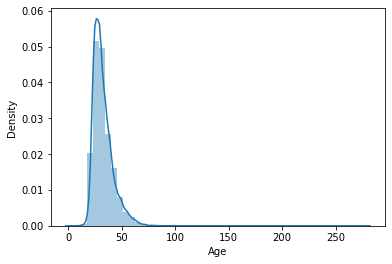

In [238]:
sns.distplot(data['Age'])

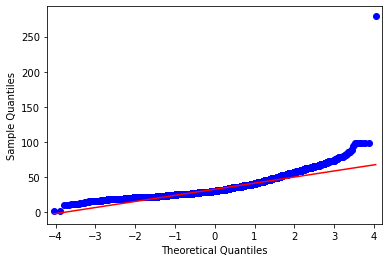

In [239]:
qqplot(data['Age'], line='r')
plt.show()

<AxesSubplot:xlabel='Age'>

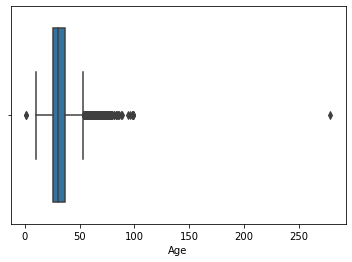

In [240]:
sns.boxplot(x=data['Age'])
#We found some outliers

In [309]:
#We can remove outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.80)
IQR = Q3 - Q1
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(37632, 2)

<AxesSubplot:xlabel='Age'>

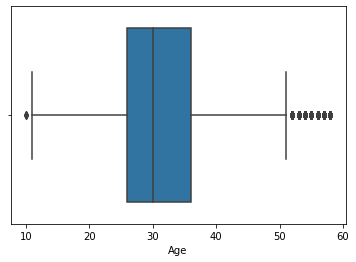

In [310]:
#We can create a box-plot after removing outliers
sns.boxplot(x=data_out['Age'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

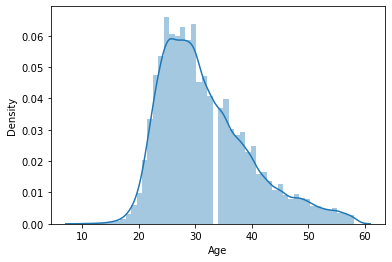

In [311]:
#Histogram after removing outliers 
sns.distplot(data_out['Age'])

<ipython-input-312-c43f738c6172>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_out['Age']=data_out['Age']**(.25)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

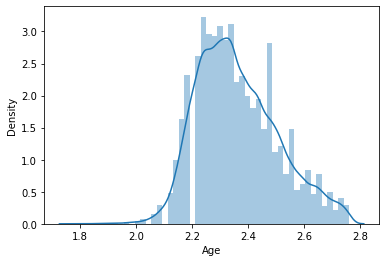

In [312]:
#Square root transformation
data_out['Age']=data_out['Age']**(.25)
sns.distplot(data_out['Age'])

In [313]:
data_out['NEWEdImpt'].value_counts()

Fairly important                      9935
Somewhat important                    9171
Very important                        8900
Not at all important/not necessary    6176
Critically important                  3450
Name: NEWEdImpt, dtype: int64

In [314]:
#Groups within 

fairly_important = data_out['NEWEdImpt'].str.contains('Fairly important', na = False)
age_fairly_important = data_out[fairly_important]['Age']

somewhat_important = data_out['NEWEdImpt'].str.contains('Somewhat important', na = False)
age_somewhat_important = data_out[somewhat_important]['Age']

very_important = data_out['NEWEdImpt'].str.contains('Very important', na = False)
age_very_important = data_out[very_important]['Age']

not_necessary = data_out['NEWEdImpt'].str.contains('not necessary', na = False)
age_not_necessary = data_out[not_necessary]['Age']

critically_important = data_out['NEWEdImpt'].str.contains('Critically important', na = False)
age_critically_important = data_out[critically_important]['Age']

age_fairly_important = age_fairly_important[age_fairly_important > 0]
age_somewhat_important = age_somewhat_important[age_somewhat_important > 0]
age_very_important = age_very_important[age_very_important>0]
age_not_necessary = age_not_necessary[age_not_necessary > 0]
age_critically_important = age_critically_important[age_critically_important > 0]

<AxesSubplot:xlabel='Age'>

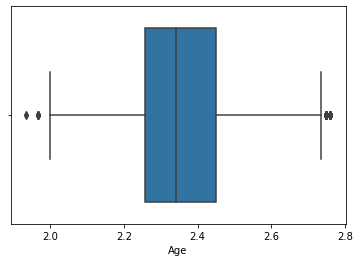

In [315]:
sns.boxplot(x = age_fairly_important)

<AxesSubplot:xlabel='Age'>

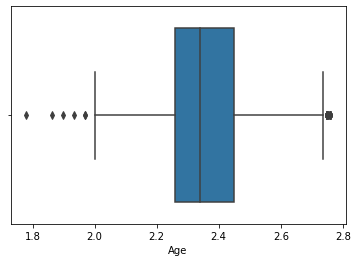

In [316]:
sns.boxplot(x = age_somewhat_important)

<AxesSubplot:xlabel='Age'>

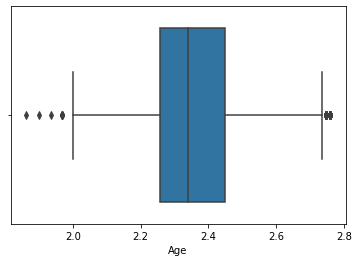

In [317]:
sns.boxplot(x = age_very_important)

<AxesSubplot:xlabel='Age'>

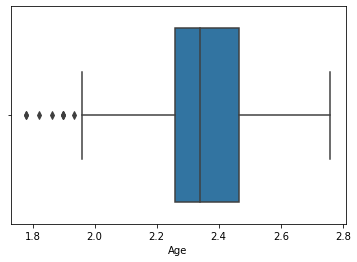

In [318]:
sns.boxplot(x = age_not_necessary)

<AxesSubplot:xlabel='Age'>

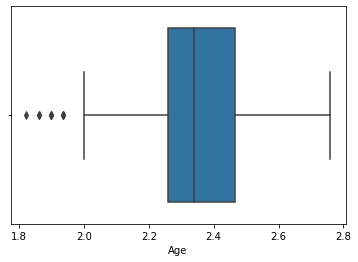

In [319]:
sns.boxplot(x = age_critically_important)

In [320]:
print(f_oneway(age_fairly_important, age_very_important, age_not_necessary, age_critically_important, age_somewhat_important))

F_onewayResult(statistic=10.639742226915537, pvalue=1.2915049652359856e-08)


In [179]:
# The expected value of p is less than 0.05
# We ca say that 